In [1]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
simulations = pd.read_csv("BasicResults.csv",index_col=0)
average_networks = pd.read_csv("AverageNetComps.csv",index_col=0)

In [180]:
simulations

,Community_Size,MetConSIN_Time,Direct_Time,MetConSIN_EndTIme,Direct_EndTIme,Average_Microbe_Difference,Average_Metabolite_Difference,Max_Microbe_Diff,Max_Metabolite_Diff
0,3,65.782874,795.808319,2.000000,1.83,0.046547,0.002971,0.075995,447.862800
1,3,34.444118,799.574412,2.000000,1.99,0.000036,-0.000090,0.000510,493.486465
2,2,40.119640,451.435873,2.000000,1.99,0.023506,-0.006926,0.027780,2004.815303
3,3,43.695621,886.863185,2.000000,1.99,0.000638,0.000697,0.001252,102.038914
4,3,42.845922,814.151082,2.000000,1.99,0.002798,0.000719,0.006253,1.450056
5,3,67.525044,764.518301,2.000000,1.99,0.052507,0.006004,0.083799,135.151728
6,3,42.736492,744.727300,2.000000,1.49,0.000255,-0.000138,0.001031,41.851193
7,3,38.094332,822.590460,2.000000,1.99,0.000050,-0.000021,0.000798,143.654765
8,2,19.558767,537.494056,2.000000,1.99,0.000045,0.003972,0.000691,5150.098551
9,2,21.027857,494.521919,1.554132,1.50,0.000383,-0.000094,0.001037,19.736612


In [4]:
times_df = pd.DataFrame(columns = ["Time (Seconds)","Method","Community Size"])
times_df["Time (Seconds)"] = np.concatenate([simulations["MetConSIN_Time"],simulations["Direct_Time"]])
times_df["Method"] = ["MetConSIN"]*len(simulations) + ["Direct DFBA"]*len(simulations)
times_df["Community Size"] = np.concatenate([simulations["Community_Size"],simulations["Community_Size"]])

Text(0, 0.5, 'Clock Time to Complete Simulation')

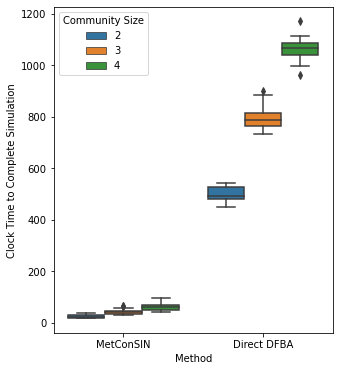

In [111]:
fig,ax = plt.subplots(figsize = (5,6))
sb.boxplot(data=times_df, y="Time (Seconds)", x="Method",hue= "Community Size",ax =ax)
ax.set_ylabel("Clock Time to Complete Simulation")

In [6]:
time_average_diff = pd.DataFrame(columns = ["Community Size","Average Microbe Difference","Average Metabolite Difference"])
time_average_diff["Community Size"] = simulations["Community_Size"]
time_average_diff["Average Microbe Difference"] = simulations["Average_Microbe_Difference"]/simulations[["MetConSIN_EndTIme","Direct_EndTIme"]].min(axis = 1)
time_average_diff["Average Metabolite Difference"] = simulations["Average_Metabolite_Difference"]/simulations[["MetConSIN_EndTIme","Direct_EndTIme"]].min(axis = 1)



Text(0, 0.5, 'Time & Taxa Averaged Absolute Difference (% of Max)')

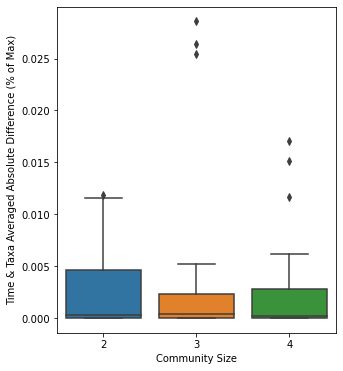

In [112]:
fig,ax = plt.subplots(figsize = (5,6))
sb.boxplot(data=time_average_diff, y="Average Microbe Difference", x="Community Size",ax = ax)
ax.set_ylabel("Time & Taxa Averaged Absolute Difference (% of Max)")

Text(0, 0.5, 'Time & Metabolite Averaged Absolute Difference (% of Max)')

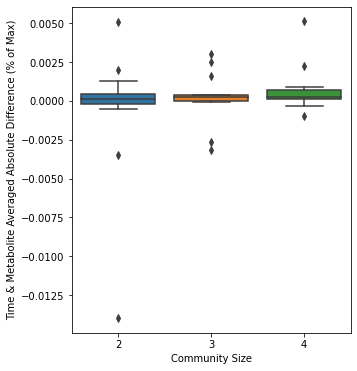

In [113]:
fig,ax = plt.subplots(figsize = (5,6))
sb.boxplot(data=time_average_diff, y="Average Metabolite Difference", x="Community Size",ax =ax)
ax.set_ylabel("Time & Metabolite Averaged Absolute Difference (% of Max)")

In [9]:
average_networks

,Proportion MetConSIN Shared,Proportion DirectDFBA Shared,Number Different Sign,Average ABS Difference
0,1.0,0.529412,1.0,3.706499
2,1.0,0.542254,0.0,3.635642
5,1.0,0.523077,1.0,4.402402
6,1.0,0.538283,0.0,0.638253
7,1.0,0.531674,0.0,1.428192
9,1.0,0.536842,0.0,0.600197
10,1.0,0.536842,0.0,0.752823
12,1.0,0.530000,0.0,1.848247
13,1.0,0.538462,0.0,0.545541
14,1.0,0.523077,1.0,4.261649


In [20]:
trials = [fl for fl in os.listdir() if fl.isnumeric()]

In [21]:
os.listdir(trials[0])

['MicrobeDiffs.tsv',
 'ComparedNetworks',
 'DirectDFBA',
 'MetConSIN',
 'network_comparison_summary.tsv',
 'directdfba.log',
 'metconsin.log',
 'MetaboliteDiffs.tsv']

In [22]:
pd.read_csv(os.path.join(trials[0],'network_comparison_summary.tsv'),index_col=0,sep='\t')

,Proportion MetConSIN Shared,Proportion DirectDFBA Shared,Number Different Sign,Average ABS Difference
0.3299,1.000000,0.527682,0.0,2.985237
0.66035,1.000000,0.527682,0.0,0.271570
0.6611,1.000000,0.529412,3.0,0.256758
0.6613,1.000000,0.529412,3.0,0.256758
1.00225,1.000000,0.527682,0.0,0.152304
1.6716,0.095082,0.644444,29.0,1.426280
Average,1.000000,0.518519,0.0,1.335682


In [23]:
os.listdir(os.path.join(trials[0],"ComparedNetworks"))

['0.6603_network.tsv',
 '0.6613_network.tsv',
 'average_network.tsv',
 '1.0023_network.tsv',
 '1.6716_network.tsv',
 '0.3299_network.tsv',
 '0.6611_network.tsv']

In [24]:
pd.read_csv(os.path.join(trials[0],"ComparedNetworks",'0.6613_network.tsv'),index_col=0,sep='\t')

,MetConSIN,DirectDFBA,Difference,ABS_Difference,SameSign
bc1001##L-Lysine,-0.079261,-0.179221,0.099959,0.099959,1.0
bc1009##H+,-1.237519,3.220195,-4.457713,4.457713,-1.0
bc1009##L-Asparagine,-0.314933,-0.126787,-0.188146,0.188146,1.0
"bc1008##1,2-Diacyl-sn-glycerol dioctadecanoyl",-0.007158,-0.016520,0.009362,0.009362,1.0
bc1008##Chorismate,-0.000322,-0.000744,0.000422,0.000422,1.0
...,...,...,...,...,...
bc1008##Ca2+,-0.000161,-0.000372,0.000211,0.000211,1.0
bc1008##CO2,0.029881,0.068967,-0.039085,0.039085,1.0
bc1008##L-Lysine,-0.016399,-0.037850,0.021451,0.021451,1.0
"bc1001##meso-2,6-Diaminopimelate",-0.006945,-0.015704,0.008759,0.008759,1.0


In [71]:
df

,Proportion MetConSIN Shared,Proportion DirectDFBA Shared,Number Different Sign,Average ABS Difference,Trial
0.38495,1.000000,0.533333,0.0,1.701683,22
1.1428,1.000000,0.533333,0.0,0.171959,22
1.75785,0.013158,0.500000,2.0,3.602288,22


In [125]:
all_networks = pd.DataFrame()
for tri in trials:
    try:
        df = pd.read_csv(os.path.join(tri,'network_comparison_summary.tsv'),index_col=0,sep='\t')    
        df.drop("Average",inplace=True)
        df["Trial"] = [tri]*len(df)
        df["Number of Shared Edges"] = np.empty(len(df))
        for ky in df.index:
            compdf = pd.read_csv(os.path.join(tri,"ComparedNetworks",'{:.4f}_network.tsv'.format(float(ky))),index_col=0,sep='\t')
            df.loc[ky,"Number of Shared Edges"] = len(compdf)
        all_networks = pd.concat([all_networks,df])
    except:
        pass
all_networks["Time"] = all_networks.index
all_networks.index = range(len(all_networks))
all_networks["Community Size"] = [simulations.loc[int(all_networks.loc[i,"Trial"]),"Community_Size"] for i in all_networks.index]
all_networks["Proportion Different Sign"] = all_networks['Number Different Sign']/all_networks["Number of Shared Edges"]
all_networks["Direct DFBA Number Edges"] =  all_networks['Number of Shared Edges']/ all_networks['Proportion DirectDFBA Shared']
all_networks["MetConSIN Number Edges"] =  all_networks['Number of Shared Edges']/ all_networks['Proportion MetConSIN Shared']
all_networks["Direct DFBA Number Extra Edges"] =  all_networks["Direct DFBA Number Edges"] - all_networks["MetConSIN Number Edges"]

In [126]:
all_networks.shape

(187, 12)

In [127]:
all_networks.head()

,Proportion MetConSIN Shared,Proportion DirectDFBA Shared,Number Different Sign,Average ABS Difference,Trial,Number of Shared Edges,Time,Community Size,Proportion Different Sign,Direct DFBA Number Edges,MetConSIN Number Edges,Direct DFBA Number Extra Edges
0,1.0,0.527682,0.0,2.985237,32,305.0,0.3299,4,0.000000,578.0,305.0,273.0
1,1.0,0.527682,0.0,0.271570,32,305.0,0.66035,4,0.000000,578.0,305.0,273.0
2,1.0,0.529412,3.0,0.256758,32,306.0,0.6611,4,0.009804,578.0,306.0,272.0
3,1.0,0.529412,3.0,0.256758,32,306.0,0.6613,4,0.009804,578.0,306.0,272.0
4,1.0,0.527682,0.0,0.152304,32,305.0,1.00225,4,0.000000,578.0,305.0,273.0


In [128]:
all_networks.mean()

Proportion MetConSIN Shared         0.866676
Proportion DirectDFBA Shared        0.551720
Number Different Sign               1.411765
Average ABS Difference              2.111851
Trial                                    inf
Number of Shared Edges            206.759358
Community Size                      3.096257
Proportion Different Sign           0.088122
Direct DFBA Number Edges          389.427807
MetConSIN Number Edges            236.983957
Direct DFBA Number Extra Edges    152.443850
dtype: float64

Text(0, 0.5, 'Average ABS Edge Weight Difference')

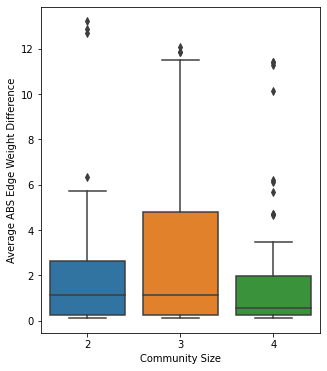

In [129]:
fig,ax = plt.subplots(figsize = (5,6))
sb.boxplot(data = all_networks,y = "Average ABS Difference",x="Community Size",ax=ax)
ax.set_ylabel("Average ABS Edge Weight Difference")

Text(0, 0.5, 'Number of Edges with Opposite Sign')

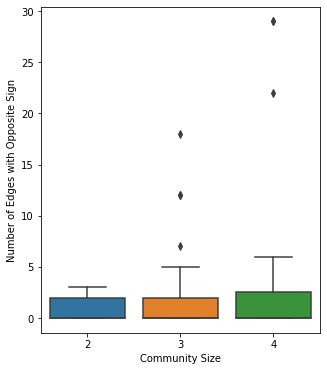

In [130]:
fig,ax = plt.subplots(figsize = (5,6))
sb.boxplot(data = all_networks,y = "Number Different Sign",x="Community Size",ax=ax)
ax.set_ylabel("Number of Edges with Opposite Sign")

(0.0, 1.0)

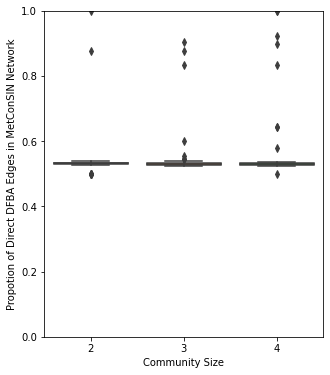

In [131]:
fig,ax = plt.subplots(figsize = (5,6))
sb.boxplot(data = all_networks,y = "Proportion DirectDFBA Shared",x="Community Size",ax=ax)
ax.set_ylabel("Propotion of Direct DFBA Edges in MetConSIN Network")
ax.set_ylim(0,1)

Text(0, 0.5, 'Number of Direct DFBA Edges Not in MetConSIN Network')

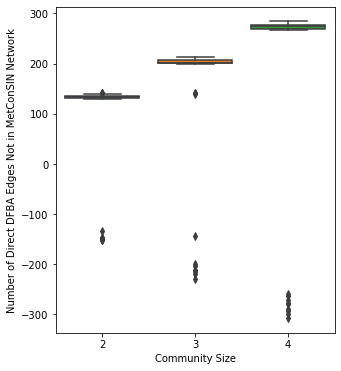

In [132]:
fig,ax = plt.subplots(figsize = (5,6))
sb.boxplot(data = all_networks,y = "Direct DFBA Number Extra Edges",x="Community Size",ax=ax)
ax.set_ylabel("Number of Direct DFBA Edges Not in MetConSIN Network")

In [133]:
all_networks

,Proportion MetConSIN Shared,Proportion DirectDFBA Shared,Number Different Sign,Average ABS Difference,Trial,Number of Shared Edges,Time,Community Size,Proportion Different Sign,Direct DFBA Number Edges,MetConSIN Number Edges,Direct DFBA Number Extra Edges
0,1.000000,0.527682,0.0,2.985237,32,305.0,0.3299,4,0.000000,578.0,305.0,273.0
1,1.000000,0.527682,0.0,0.271570,32,305.0,0.66035,4,0.000000,578.0,305.0,273.0
2,1.000000,0.529412,3.0,0.256758,32,306.0,0.6611,4,0.009804,578.0,306.0,272.0
3,1.000000,0.529412,3.0,0.256758,32,306.0,0.6613,4,0.009804,578.0,306.0,272.0
4,1.000000,0.527682,0.0,0.152304,32,305.0,1.00225,4,0.000000,578.0,305.0,273.0
...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.991489,0.527149,0.0,0.138554,14,233.0,0.79335,3,0.000000,442.0,235.0,207.0
183,0.051064,0.545455,12.0,2.043042,14,12.0,1.6052499999999998,3,1.000000,22.0,235.0,-213.0
184,1.000000,0.533333,0.0,1.701683,22,152.0,0.38495,2,0.000000,285.0,152.0,133.0
185,1.000000,0.533333,0.0,0.171959,22,152.0,1.1428,2,0.000000,285.0,152.0,133.0


In [134]:
num_edges = pd.DataFrame(columns = ["Community Size","Number of Edges","Network Type"])
num_edges["Community Size"] = np.concatenate([all_networks["Community Size"],all_networks["Community Size"]])
num_edges["Number of Edges"] = np.concatenate([all_networks["MetConSIN Number Edges"],all_networks["Direct DFBA Number Edges"]])
num_edges["Network Type"] = ["MetConSIN"]*len(all_networks) + ["Direct DFBA"]*len(all_networks)

Text(0, 0.5, 'Number of Edges in Network')

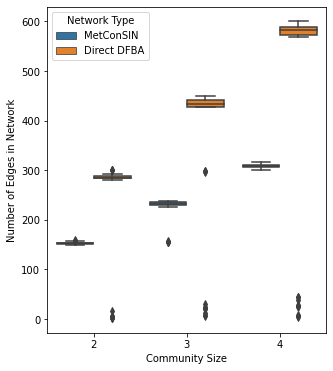

In [135]:
fig,ax = plt.subplots(figsize = (5,6))
sb.boxplot(data = num_edges,y = "Number of Edges",hue="Network Type",x="Community Size",ax=ax)
ax.set_ylabel("Number of Edges in Network")

In [120]:
all_networks.to_csv("all_networks.tsv",sep='\t')

In [160]:
os.listdir(os.path.join('0',"MetConSIN","SpeciesNetworks"))

['0.2724-0.3688',
 '0.0000-0.2601',
 '0.3351-0.3392',
 '0.0000-0.3351',
 '0.2733-0.3685',
 '0.2690-0.2724',
 '0.3392-0.3945',
 '1.1946-2.0000',
 '0.3945-0.3988',
 '0.3996-1.1946',
 '1.2105-2.0000',
 '0.2687-0.2722',
 'Difference',
 '0.2604-0.2690',
 '0.2601-0.2687',
 '0.3688-0.3758',
 '0.3758-1.2030',
 '0.0000-0.2604',
 'Combined',
 '0.2722-0.2733',
 '1.2030-2.0000',
 '0.3762-1.2105',
 'Average']

In [161]:
os.listdir(os.path.join('0',"MetConSIN","SpeciesNetworks",'0.2733-0.3685'))

['SpeciesNetworkEdges0.2733-0.3685.tsv',
 'SpeciesNetworkNodes0.2733-0.3685.tsv']

In [172]:
metcon_spnet = pd.read_csv(os.path.join('0',"MetConSIN","SpeciesNetworks","0.0000-0.2604","SpeciesNetworkEdges0.0000-0.2604.tsv"),index_col=0,sep='\t')

In [177]:
metcon_spnet[["Weight","Metabolites"]].to_latex("metcon_spnet.tex")

In [176]:
metcon_spnet

,Source,Target,Weight,Metabolites,ABSWeight,SignWeight,ABSRootWeight,SignedRootWeight
bc1002->bc1008,bc1002,bc1008,-0.032431,D-Glucose,0.032431,-1.0,0.180086,-0.180086
bc1012->bc1008,bc1012,bc1008,-0.046521,D-Glucose,0.046521,-1.0,0.215686,-0.215686
bc1002->bc1012,bc1002,bc1012,-0.152993,O2,0.152993,-1.0,0.391143,-0.391143
bc1008->bc1012,bc1008,bc1012,-0.003430,O2,0.003430,-1.0,0.058563,-0.058563
bc1008->bc1002,bc1008,bc1002,-0.003428,O2,0.003428,-1.0,0.058546,-0.058546
bc1012->bc1002,bc1012,bc1002,-0.152901,O2,0.152901,-1.0,0.391025,-0.391025


In [175]:
metcon_spnet.to_latex("metcon_spnet.tex")

In [162]:
os.listdir(os.path.join('0',"DirectDFBA","SpeciesNetworks"))

['0.3206',
 '0.7894000000000001',
 '0.27275',
 '0.26439999999999997',
 '0.16755',
 '0.26470000000000005',
 '0.33715',
 '0.32089999999999996',
 'Difference',
 '0.1302',
 '0.36685',
 '0.27044999999999997',
 '0.3723',
 '0.7971',
 '1.6052499999999998',
 '0.39665',
 'Combined',
 '0.79335',
 '0.13005',
 'Average',
 '1.6015000000000001',
 '0.2707']

In [163]:
os.listdir(os.path.join('0',"DirectDFBA","SpeciesNetworks","Combined"))

['SpeciesNetworkEdges_Combined.tsv', 'SpeciesNetworkNodes_Combined.tsv']

In [164]:
pd.read_csv(os.path.join('0',"DirectDFBA","SpeciesNetworks","Combined","SpeciesNetworkEdges_Combined.tsv"),index_col=0,sep='\t')

,0.1302,0.26470000000000005,0.2707,0.3206,0.3723,0.7894000000000001,1.6015000000000001,Source,Target
"bc1002##bc1008##1,2-Diacyl-sn-glycerol dioctadecanoyl.4-Hydroxybenzoate.5-Aminolevulinate.AMP.BET.BIOT.CMP.Ca2+.Chorismate.Cl-.Co2+.CoA.Cu2+.D-Arabinose.D-Glucose.Deoxycytidine.Folate.GTP.Glycerol.Glycine.Heme.K+.L-Alanine.L-Arginine.L-Asparagine.L-Aspartate.L-Cysteine.L-Glutamate.L-Glutamine.L-Histidine.L-Isoleucine.L-Leucine.L-Lysine.L-Methionine.L-Phenylalanine.L-Proline.L-Serine.L-Threonine.L-Tryptophan.L-Tyrosine.L-Valine.Mg.Mn2+.Myristic acid.NADP.O2.Oxidized glutathione.Putrescine.Pyridoxal.Riboflavin.S-Adenosyl-L-methionine.Spermidine.Sulfate.TRHL.TTP.Thiamin.Zn2+.dATP.dGTP.ddca.fe3.meso-2,6-Diaminopimelate",-5570.901122,-1338.226907,-1049.936545,-238.974685,-40.818274,-1.377078e-07,0,bc1002,bc1008
"bc1012##bc1008##1,2-Diacyl-sn-glycerol dioctadecanoyl.4-Hydroxybenzoate.5-Aminolevulinate.AMP.BET.BIOT.CMP.Ca2+.Chorismate.Cl-.Co2+.CoA.Cu2+.D-Arabinose.D-Glucose.Deoxycytidine.Folate.Formate.Fumarate.GTP.Glycerol.Glycine.Heme.K+.L-Alanine.L-Arginine.L-Asparagine.L-Aspartate.L-Cysteine.L-Glutamate.L-Glutamine.L-Histidine.L-Isoleucine.L-Leucine.L-Lysine.L-Methionine.L-Phenylalanine.L-Proline.L-Serine.L-Threonine.L-Tryptophan.L-Tyrosine.L-Valine.Mg.Mn2+.Myristic acid.NADP.O2.Oxidized glutathione.Putrescine.Pyridoxal.Riboflavin.S-Adenosyl-L-methionine.Spermidine.Sulfate.TRHL.TTP.Thiamin.Zn2+.dATP.dGTP.ddca.fe3.meso-2,6-Diaminopimelate",-7717.811684,-1924.555999,-1495.356082,-308.179293,0.000000,0.000000e+00,0,bc1012,bc1008
"bc1002##bc1012##1,2-Diacyl-sn-glycerol dioctadecanoyl.4-Hydroxybenzoate.5-Aminolevulinate.AMP.Ala-Ala.BET.BIOT.CMP.Ca2+.Chorismate.Cl-.Co2+.CoA.Cu2+.D-Arabinose.D-Glucose.Deoxycytidine.Deoxyguanosine.Folate.GTP.Glycerol.Glycine.Heme.K+.L-Alanine.L-Arginine.L-Asparagine.L-Aspartate.L-Cysteine.L-Glutamate.L-Glutamine.L-Histidine.L-Isoleucine.L-Leucine.L-Lysine.L-Methionine.L-Phenylalanine.L-Proline.L-Serine.L-Threonine.L-Tryptophan.L-Tyrosine.L-Valine.Mg.Mn2+.Myristic acid.NADP.Nicotinamide ribonucleotide.O2.Oxidized glutathione.Putrescine.Pyridoxal.Riboflavin.S-Adenosyl-L-methionine.Spermidine.Sulfate.TRHL.TTP.Thiamin.UMP.Zn2+.dATP.dGTP.ddca.fe3.meso-2,6-Diaminopimelate",-15620.771391,-4104.445044,-3244.463659,-792.222308,-167.145193,-5.638931e-07,0,bc1002,bc1012
"bc1008##bc1012##1,2-Diacyl-sn-glycerol dioctadecanoyl.4-Hydroxybenzoate.5-Aminolevulinate.AMP.BET.BIOT.CMP.Ca2+.Chorismate.Cl-.Co2+.CoA.Cu2+.D-Arabinose.D-Glucose.Deoxycytidine.Folate.Formate.Fumarate.GTP.Glycerol.Glycine.Heme.K+.L-Alanine.L-Arginine.L-Asparagine.L-Aspartate.L-Cysteine.L-Glutamate.L-Glutamine.L-Histidine.L-Isoleucine.L-Leucine.L-Lysine.L-Methionine.L-Phenylalanine.L-Proline.L-Serine.L-Threonine.L-Tryptophan.L-Tyrosine.L-Valine.Mg.Mn2+.Myristic acid.NADP.O2.Oxidized glutathione.Putrescine.Pyridoxal.Riboflavin.S-Adenosyl-L-methionine.Spermidine.Sulfate.TRHL.TTP.Thiamin.Zn2+.dATP.dGTP.ddca.fe3.meso-2,6-Diaminopimelate",-7717.811684,-1924.555999,-1495.356082,-308.179293,0.000000,0.000000e+00,0,bc1008,bc1012
"bc1008##bc1002##1,2-Diacyl-sn-glycerol dioctadecanoyl.4-Hydroxybenzoate.5-Aminolevulinate.AMP.BET.BIOT.CMP.Ca2+.Chorismate.Cl-.Co2+.CoA.Cu2+.D-Arabinose.D-Glucose.Deoxycytidine.Folate.GTP.Glycerol.Glycine.Heme.K+.L-Alanine.L-Arginine.L-Asparagine.L-Aspartate.L-Cysteine.L-Glutamate.L-Glutamine.L-Histidine.L-Isoleucine.L-Leucine.L-Lysine.L-Methionine.L-Phenylalanine.L-Proline.L-Serine.L-Threonine.L-Tryptophan.L-Tyrosine.L-Valine.Mg.Mn2+.Myristic acid.NADP.O2.Oxidized glutathione.Putrescine.Pyridoxal.Riboflavin.S-Adenosyl-L-methionine.Spermidine.Sulfate.TRHL.TTP.Thiamin.Zn2+.dATP.dGTP.ddca.fe3.meso-2,6-Diaminopimelate",-5570.901122,-1338.226907,-1049.936545,-238.974685,-40.818274,-1.377078e-07,0,bc1008,bc1002
"bc1012##bc1002##1,2-Diacyl-sn-glycerol dioctadecanoyl.4-Hydroxybenzoate.5-Aminolevulinate.AMP.Ala-Ala.BET.BIOT.CMP.Ca2+.Chorismate.Cl-.Co2+.CoA.Cu2+.D-Arabinose.D-Glucose.Deoxycytidine.Deoxyguanosine.Folate.GTP.Glycerol.Glycine.

In [165]:
os.listdir(os.path.join('0',"DirectDFBA","SpeciesNetworks","0.1302"))

['SpeciesNetworkNodes_0.1302.tsv', 'SpeciesNetworkEdges_0.1302.tsv']

In [166]:
ddfba_spnet = pd.read_csv(os.path.join('0',"DirectDFBA","SpeciesNetworks","0.1302","SpeciesNetworkEdges_0.1302.tsv"),index_col=0,sep='\t')

In [167]:
ddfba_spnet

,Source,Target,Weight,Metabolites,ABSWeight,SignWeight,ABSRootWeight,SignedRootWeight
bc1002->bc1008,bc1002,bc1008,-5570.901122,"1,2-Diacyl-sn-glycerol dioctadecanoyl.4-Hydrox...",5570.901122,-1.0,74.638469,-74.638469
bc1012->bc1008,bc1012,bc1008,-7717.811684,"1,2-Diacyl-sn-glycerol dioctadecanoyl.4-Hydrox...",7717.811684,-1.0,87.851077,-87.851077
bc1002->bc1012,bc1002,bc1012,-15620.771391,"1,2-Diacyl-sn-glycerol dioctadecanoyl.4-Hydrox...",15620.771391,-1.0,124.983084,-124.983084
bc1008->bc1012,bc1008,bc1012,-7717.811684,"1,2-Diacyl-sn-glycerol dioctadecanoyl.4-Hydrox...",7717.811684,-1.0,87.851077,-87.851077
bc1008->bc1002,bc1008,bc1002,-5570.901122,"1,2-Diacyl-sn-glycerol dioctadecanoyl.4-Hydrox...",5570.901122,-1.0,74.638469,-74.638469
bc1012->bc1002,bc1012,bc1002,-15620.771391,"1,2-Diacyl-sn-glycerol dioctadecanoyl.4-Hydrox...",15620.771391,-1.0,124.983084,-124.983084


In [178]:
ddfba_spnet[["Weight","Metabolites"]].to_latex("ddfba_spnet.tex")